## **Data Quality Assesment - Task 1**

**Backgorund Information**

Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy.

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

> The client provided KPMG with 3 datasets:
>- Customer Demographic
- Customer Addresses
- Transactions data in the past 3 months

So I decided to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

In [ ]:
## Import Library

import pandas as pd
from datetime import datetime, date

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [ ]:
Transactions = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", 'Transactions',header=1)
CustAddress = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", 'CustomerAddress',header=1)
CustDemographic = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", 'CustomerDemographic',header=1)

### **1. Transaction Data**

In [ ]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
# Count null values for each column
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
# Check duplicates value
Transactions.duplicated().sum()

0

In [ ]:
# Check unique value
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [ ]:
# Count the number of rows that contain no NaN values in all its columns
rows_without_nans = Transactions.notna().all(axis=1).sum()
print('Number of rows without NaN:', rows_without_nans)
print('Number of rows contains NaN:', (20000-rows_without_nans) )

Number of rows without NaN: 19445
Number of rows contains NaN: 555


In [ ]:
# Remove rows that contains null value
Transactions.dropna(inplace=True)

# Check result
Transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [ ]:
Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,0.500849,1107.337193,555.585260,38201.758653
std,5779.669087,30.571996,1011.889153,0.500012,582.662400,405.596541,2878.067854
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,4976.000000,18.000000,857.000000,0.000000,575.270000,215.140000,35667.000000
50%,9985.000000,45.000000,1741.000000,1.000000,1163.890000,507.580000,38216.000000
75%,14997.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [ ]:
pd.DataFrame(Transactions['online_order'].value_counts())

,online_order
1.0,9739
0.0,9706


In [ ]:
pd.DataFrame(Transactions['order_status'].value_counts())

,order_status
Approved,19273
Cancelled,172


In [ ]:
pd.DataFrame(Transactions['brand'].value_counts())

,brand
Solex,4169
WeareA2B,3245
Giant Bicycles,3244
OHM Cycles,2993
Trek Bicycles,2931
Norco Bicycles,2863


In [ ]:
pd.DataFrame(Transactions['product_line'].value_counts())

,product_line
Standard,13920
Road,3894
Touring,1213
Mountain,418


In [ ]:
pd.DataFrame(Transactions['product_class'].value_counts())

,product_class
medium,13587
high,2952
low,2906


In [ ]:
pd.DataFrame(Transactions['product_size'].value_counts())

,product_size
medium,12767
large,3900
small,2778


In [ ]:
pd.DataFrame(Transactions['standard_cost'].value_counts())

,standard_cost
388.920000,460
954.820000,389
53.620000,269
161.600000,232
260.140000,230
...,...
151.960000,123
206.350000,111
312.735016,1
270.299988,1


In [ ]:
Transactions['product_first_sold_date'].head()

0    41245.0
1    41701.0
2    36361.0
3    36145.0
4    42226.0
Name: product_first_sold_date, dtype: float64

the column product_first_sold_date seems has datatype float which is inapproriate datatype for data analysis. so, it need convert to datetima datatype.

In [ ]:
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date']).dt.date
Transactions['product_first_sold_date'].head(10)

0    1970-01-01
1    1970-01-01
2    1970-01-01
3    1970-01-01
4    1970-01-01
5    1970-01-01
6    1970-01-01
7    1970-01-01
8    1970-01-01
9    1970-01-01
Name: product_first_sold_date, dtype: object

In [ ]:
Transactions['product_first_sold_date'].value_counts()

1970-01-01    19445
Name: product_first_sold_date, dtype: int64

The result show that products first sold at the same date

### **2. Customer addresses**

In [ ]:
CustAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
CustAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
CustAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [ ]:
# Count null values for each column
CustAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
# Check duplicates value
CustAddress.duplicated().sum()

0

In [ ]:
# Check unique value
CustAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [ ]:
# Count the number of rows that contain no NaN values in all its columns
rows_without_nans = CustAddress.notna().all(axis=1).sum()
print('Number of rows without NaN:', rows_without_nans)
print('Number of rows contains NaN:', (20000-rows_without_nans) )

Number of rows without NaN: 3999
Number of rows contains NaN: 16001


In [ ]:
# Remove rows that contains null value
CustAddress.dropna(inplace=True)

# Check result
CustAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
pd.DataFrame(CustAddress['state'].value_counts())

,state
NSW,2054
VIC,939
QLD,838
New South Wales,86
Victoria,82


There are inconsistent values in state column

In [ ]:
CustAddress['state'].replace('New South Wales','NSW', inplace=True)
CustAddress['state'].replace('Victoria','VIC',inplace=True)

pd.DataFrame(CustAddress['state'].value_counts())

,state
NSW,2140
VIC,1021
QLD,838


In [ ]:
pd.DataFrame(CustAddress['country'].value_counts())

,country
Australia,3999


In [ ]:
pd.DataFrame(CustAddress['property_valuation'].value_counts())

,property_valuation
9,647
8,646
10,577
7,493
11,281
6,238
5,225
4,214
12,195
3,186


In [ ]:
pd.DataFrame(CustAddress['address'].value_counts())

,address
3 Mariners Cove Terrace,2
3 Talisman Place,2
64 Macpherson Junction,2
359 Briar Crest Road,1
4543 Service Terrace,1
...,...
5063 Shopko Pass,1
09 Hagan Pass,1
87897 Lighthouse Bay Pass,1
294 Lawn Junction,1


In [ ]:
CustAddress[CustAddress['address'].isin(['3 Talisman Place','3 Mariners Cove Terrace','64 Macpherson Junction'])]

,customer_id,address,postcode,state,country,property_valuation
732,737,3 Talisman Place,4811,QLD,Australia,2
2315,2320,64 Macpherson Junction,2208,NSW,Australia,11
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


### **3. Customer Demographic Data**

In [ ]:
CustDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
CustDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
CustDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [ ]:
# add new column age
# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))

CustDemographic['Age'] = CustDemographic['DOB'].apply(age)
CustDemographic['Age'].head()

0    70.0
1    42.0
2    69.0
3    62.0
4    46.0
Name: Age, dtype: float64

<Axes: >

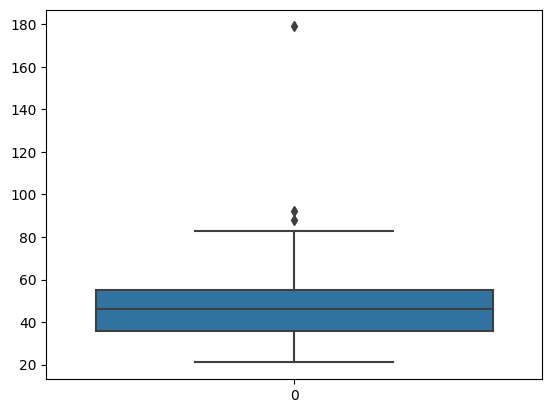

In [ ]:
# checking for outliers
import seaborn as sns
sns.boxplot(CustDemographic['Age'])

the boxplot show that there are several outliers identified in age column which means also BOD column. the outliers meaning customer age is above 170 know. it is suspicious.

In [ ]:
CustDemographic[CustDemographic['Age']>170]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,179.0


In [ ]:
# Count null values for each column
CustDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
Age                                     87
dtype: int64

In [ ]:
# Check duplicates value
CustDemographic.duplicated().sum()

0

In [ ]:
# Check unique value
CustDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
Age                                      56
dtype: int64

In [ ]:
# Count the number of rows that contain no NaN values in all its columns
rows_without_nans = CustDemographic.notna().all(axis=1).sum()
print('Number of rows without NaN:', rows_without_nans)
print('Number of rows contains NaN:', (20000-rows_without_nans) )

Number of rows without NaN: 2630
Number of rows contains NaN: 17370


In [ ]:
# Remove rows that contains null value
CustDemographic.dropna(inplace=True)

# Check result
CustDemographic.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [ ]:
# Check unique value
CustDemographic.nunique()

customer_id                            2630
first_name                             2234
last_name                              2560
gender                                    4
past_3_years_bike_related_purchases     100
DOB                                    2413
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
Age                                      54
dtype: int64

In [ ]:
pd.DataFrame(CustDemographic['gender'].value_counts())

,gender
Female,1366
Male,1262
F,1
Femal,1


there are inconsistent values in gender attributes. change value into only 2 kinds gender and ensure the consistency value.

In [ ]:
CustDemographic['gender'].replace('F','Female', inplace=True)
CustDemographic['gender'].replace('Femal','Female',inplace=True)

pd.DataFrame(CustDemographic['gender'].value_counts())

,gender
Female,1368
Male,1262


In [ ]:
pd.DataFrame(CustDemographic['job_title'].value_counts())

,job_title
Social Worker,38
Sales Representative,36
Chemical Engineer,34
Dental Hygienist,34
Registered Nurse,33
...,...
Database Administrator I,2
Human Resources Assistant IV,2
Research Assistant III,2
Database Administrator II,1


In [ ]:
pd.DataFrame(CustDemographic['job_industry_category'].value_counts())

,job_industry_category
Manufacturing,635
Financial Services,626
Health,496
Retail,278
Property,222
IT,119
Entertainment,110
Argiculture,91
Telecommunications,53


In [ ]:
pd.DataFrame(CustDemographic['wealth_segment'].value_counts())

,wealth_segment
Mass Customer,1300
High Net Worth,674
Affluent Customer,656


In [ ]:
pd.DataFrame(CustDemographic['deceased_indicator'].value_counts())

,deceased_indicator
N,2628
Y,2


In [ ]:
pd.DataFrame(CustDemographic['owns_car'].value_counts())

,owns_car
Yes,1361
No,1269


In [ ]:
pd.DataFrame(CustDemographic['tenure'].value_counts())

,tenure
7.0,157
5.0,155
12.0,154
16.0,148
8.0,147
10.0,143
9.0,141
18.0,140
11.0,137
6.0,135


In [ ]:
pd.DataFrame(CustDemographic['default'].value_counts())

,default
1,87
-1,75
100,72
-100,67
ï½ï½¨(Â´âï½â©,45
...,...
ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ,20
(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),20
ð¾ ð ð ð ð ð ð ð,20
âªâªtestâª,20


In [ ]:
CustDemographic['default'].unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0), '0/0', 'ð©ð½', 'nil', -100,
       'â°â´âµ', 'ð', 'ÅâÂ´â°ËÃÂ¨ËÃâââ',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       '!@#$%^&*()', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·', "'",
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«ÍiÌÌ¹ÍÌ³Ì³Ì®ÍÌ«nÍdÌ´ÌªÌÌ ÍÌ°ÍÌ©ÍÍÍÌ²TÍ¢ÍÌ¼ÍÌªhÍÍÌ®Ì»eÌ¬ÌÍÌ Ì¤Ì¹ÌWÍÍÍÌÌÍÍaÍÍÍÌ¹Ì¼',
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       '../../../../../../../../../../../etc/passwd%00', 'åè£½æ¼¢èª',
       'ãã¼ãã£ã¼ã¸è¡ããªãã', 1, -0.5,
       'ZÌ®ÌÍÌ\xa0ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ\xadÌÌ®', 'ã',
       '1;DROP TABLE users', -1, '00ËÆ$-',

> We notice that the default column contains some special characters so we decide to drop it, in order further investigation can be performed on this column.



